In [2]:
import os
#virtually move to parent directory
os.chdir("..")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np  

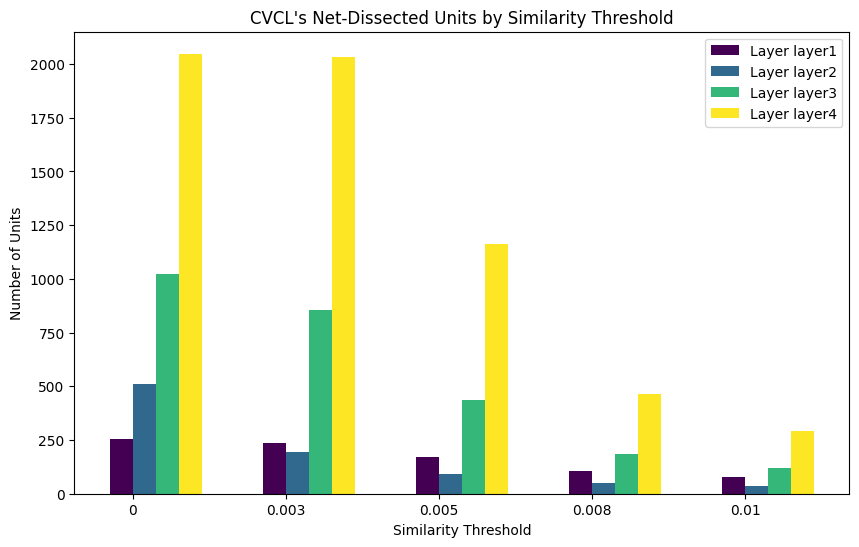

In [7]:
path = "neuron_concept/netdis_cvcl_005.csv"
df_desc = pd.read_csv(path)

# similarity thresholds
thresholds = [0, 0.003, 0.005, 0.008, 0.01] 

# dict{layer: [unit_count1, unit_count2, ...]}
unit_count_by_layer = {layer: [] for layer in df_desc['layer'].unique()}

# per layer unit count 
for threshold in thresholds:
    filtered_data = df_desc[df_desc['score'] >= threshold]
    counts = filtered_data['layer'].value_counts()
    for layer in unit_count_by_layer.keys():
        unit_count_by_layer[layer].append(counts.get(layer, 0))

plt.figure(figsize=(10, 6))
bar_width = 0.15  # width of bar
index = np.arange(len(thresholds))

colors = plt.cm.viridis(np.linspace(0, 1, len(unit_count_by_layer)))  # viridis colormap
for i, (layer, counts) in enumerate(unit_count_by_layer.items()):
    plt.bar(index + i * bar_width, counts, bar_width, label=f'Layer {layer}', color=colors[i])

plt.xlabel('Similarity Threshold')
plt.ylabel('Number of Units')
plt.title('CVCL\'s Net-Dissected Units by Similarity Threshold')
plt.xticks(index + bar_width / 2, thresholds)  # x label position
plt.legend()
plt.show()

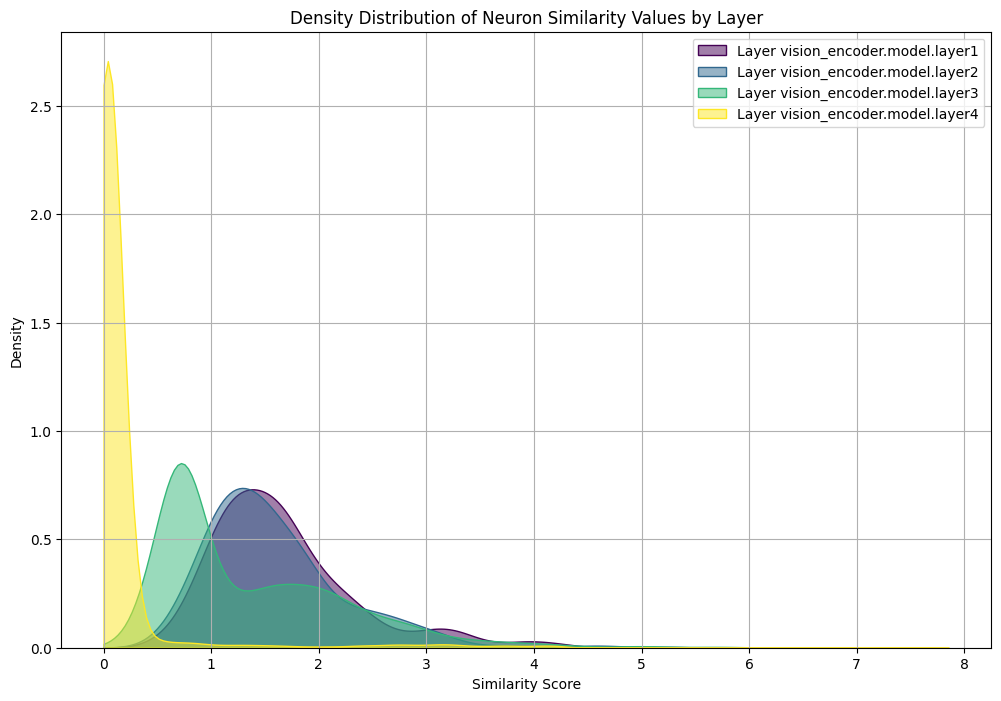

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载CSV文件
path = "neuron_concept/cvcl_broden_broden.csv"
df_desc = pd.read_csv(path)

# 选择四个特定的层
layers = ['vision_encoder.model.layer1', 'vision_encoder.model.layer2', 'vision_encoder.model.layer3', 'vision_encoder.model.layer4']  # 假设这是你要展示的层的名称

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(layers)))

# 为每个层绘制密度图
for i, layer in enumerate(layers):
    # 筛选层的数据
    layer_data = df_desc[df_desc['layer'] == layer]['similarity']
    # 绘制密度图
    sns.kdeplot(layer_data, fill=True, color=colors[i], common_norm=False, alpha=0.5, label=f'Layer {layer}', clip=(0, None))

plt.title('Density Distribution of Neuron Similarity Values by Layer')
plt.xlabel('Similarity Score')
plt.legend()
plt.grid(True)
plt.show()

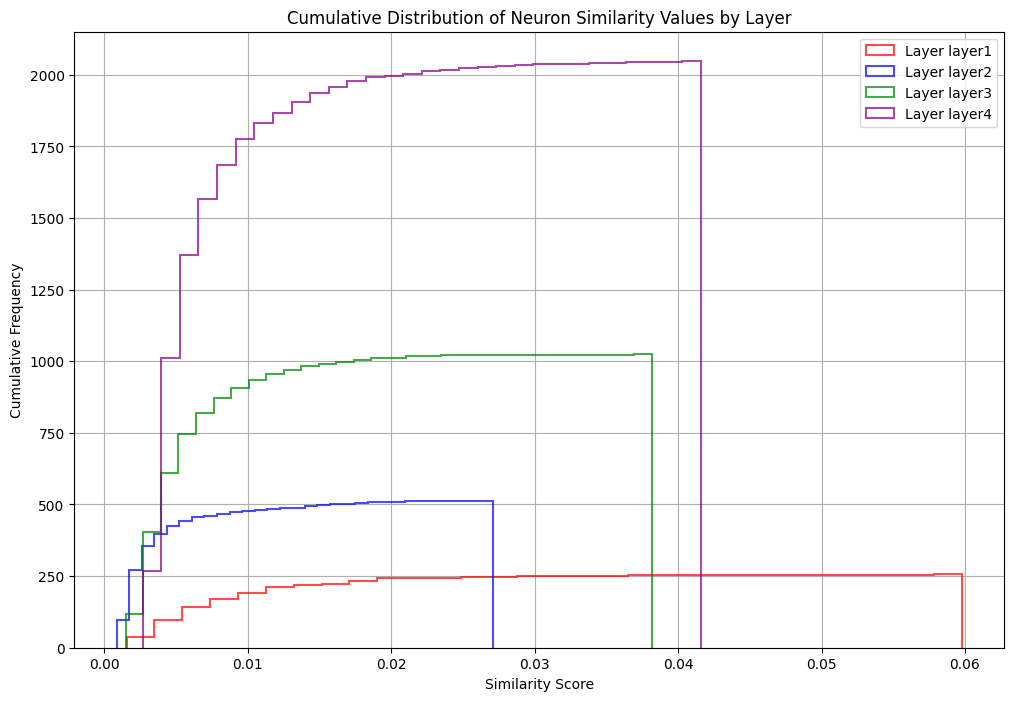

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载CSV文件
path = "neuron_concept/netdis_cvcl_005.csv"
df_desc = pd.read_csv(path)

# 选择四个特定的层
layers = ['layer1', 'layer2', 'layer3', 'layer4']  # 假设这是你要展示的层的名称

plt.figure(figsize=(12, 8))

# 给每个层使用不同的颜色绘制累积直方图
colors = ['red', 'blue', 'green', 'purple']
for layer, color in zip(layers, colors):
    # 筛选层的数据
    layer_data = df_desc[df_desc['layer'] == layer]['score']
    # 绘制累积直方图
    plt.hist(layer_data, bins=30, color=color, alpha=0.7, cumulative=True, histtype='step', linewidth=1.5, label=f'Layer {layer}')

plt.title('Cumulative Distribution of Neuron Similarity Values by Layer')
plt.xlabel('Similarity Score')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.grid(True)
plt.show()

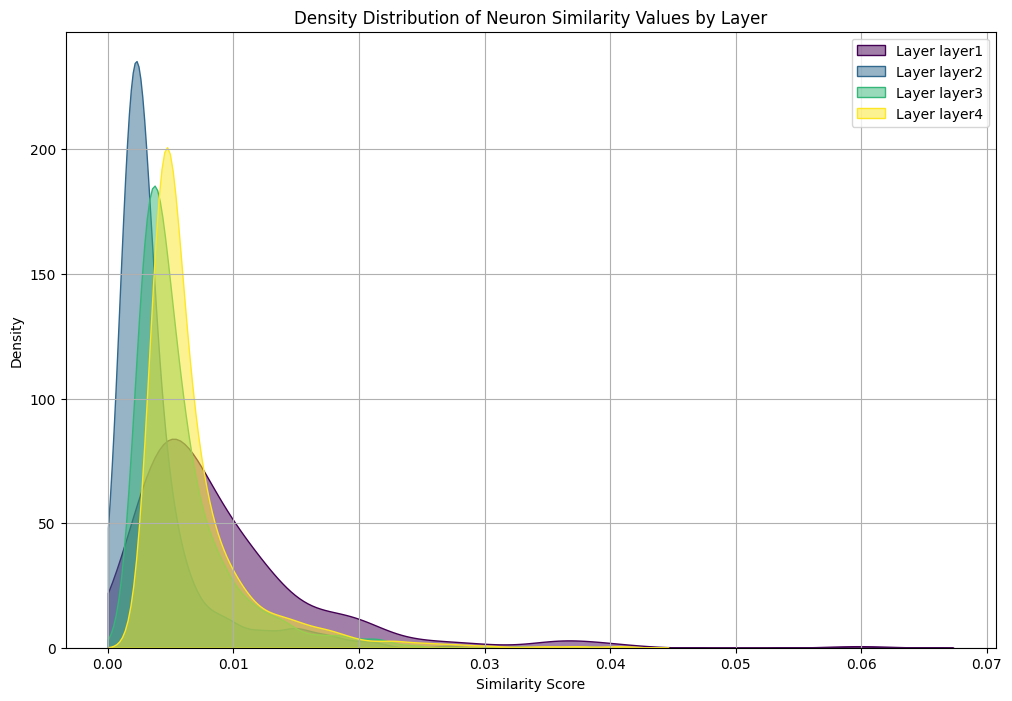

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载CSV文件
path = "neuron_concept/netdis_cvcl_005.csv"
df_desc = pd.read_csv(path)

# 选择四个特定的层
layers = ['layer1', 'layer2', 'layer3', 'layer4']  # 假设这是你要展示的层的名称

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(layers)))

# 为每个层绘制密度图
for i, layer in enumerate(layers):
    # 筛选层的数据
    layer_data = df_desc[df_desc['layer'] == layer]['score']
    # 绘制密度图
    sns.kdeplot(layer_data, fill=True, color=colors[i], common_norm=False, alpha=0.5, label=f'Layer {layer}', clip=(0, None))

plt.title('Density Distribution of Neuron Similarity Values by Layer')
plt.xlabel('Similarity Score')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 根据实际的层数进行调整
num_layers = 4  
layers = "vision_encoder.mocddel.layer1,vision_encoder.model.layer2,vision_encoder.model.layer3,vision_encoder.model.layer4"
layers = layers.split(",")  

df = pd.read_csv('/home/xke001/demo/zero-shot/neuron_concept/cvcl_broden_broden.csv')
broden_category = pd.read_csv("/home/Dataset/xueyi/broden1_227/label.csv")
df_merged = df.merge(broden_category, left_on='description', right_on='label', how='left')


# 初始化每层的类别计数字典
category_counts = {layer: {} for layer in layers}

# 读取所有可能的类别
all_categories = set(broden_category['category'].unique())

# 初始化绘图数据
plot_data = {category: [0] * num_layers for category in all_categories}

# 遍历每层的数据
for i, layer in enumerate(layers):
    # 从你的描述看，这里可能需要具体的层级数据，我们假设每个层的数据都在 df_merged 中，通过一些层级的标记进行筛选
    # 假设 layer 列可以用于区分不同的层级数据
    df_layer = df_merged[df_merged['layer'] == layer]  
    
    # 统计每个类别的独特标签数量
    category_count = df_layer.groupby('category')['description'].nunique()
    
    for category in all_categories:
        if category in category_count:
            plot_data[category][i] = category_count[category]

# 指定每个类别的颜色和线条风格
colors = {
    'object': 'blue',
    'part': 'tomato',
    'scene': '#FFA500',  # 橙黄色
    'material': 'purple',
    'texture': 'mediumaquamarine',  # 淡绿色
    'color': '#ADD8E6'  # 淡蓝色
}

# 绘图
plt.figure(figsize=(7, 6))
for category, data in plot_data.items():
    plt.plot([f'layer{i+1}' for i in range(num_layers)], data, marker='o', markerfacecolor='none', label=category, color=colors.get(category, 'gray'), linestyle='--', dashes=(5, 2))

plt.title('CVCL ResNet50 Unique Detectors by Layer')
plt.xlabel('Convolutional Layer')
plt.ylabel('Number of Unique Detectors')
plt.legend(title='Category')
plt.grid(True, linestyle='--', axis='y')
plt.show()

KeyError: 'label'